# Boston Weather, Air Quality, and Pollen Analysis

## 1. Import Libraries and Load Data

We import essential libraries for data manipulation (`pandas`) and visualization (`seaborn`, `matplotlib`).  

Then, we load three datasets: weather, air pollution, and pollen counts. We skip the first 3 rows of the weather CSV due to metadata, and we inspect column names to ensure correct loading.

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
weather = pd.read_csv("boston-weather-data(open_meteo) (1).csv", skiprows=3)
print(weather.columns.tolist())
pollution = pd.read_csv("boston_pollutants_with_aqi.csv")
pollen = pd.read_csv("EPHT_Pollen_Data.csv")

# Parse date columns
weather['time'] = pd.to_datetime(weather['time'])
pollution['date'] = pd.to_datetime(pollution['date'])
pollen['Date'] = pd.to_datetime(pollen['Date'])

# Rename and merge
weather.rename(columns={'time': 'Date'}, inplace=True)
pollution.rename(columns={'date': 'Date'}, inplace=True)

merged = (
    weather
    .merge(pollution, on='Date', how='inner')
    .merge(pollen, on='Date', how='inner')
)

merged.info()

# Filter for pollen season (March through October)
# -----------------------------
merged = merged[merged['Date'].dt.month.isin(range(3, 11))]




['time', 'temperature_2m_mean (°C)', 'precipitation_sum (mm)', 'apparent_temperature_mean (°C)', 'wind_gusts_10m_max (km/h)', 'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2066 non-null   datetime64[ns]
 1   temperature_2m_mean (°C)         2066 non-null   float64       
 2   precipitation_sum (mm)           2066 non-null   float64       
 3   apparent_temperature_mean (°C)   2066 non-null   float64       
 4   wind_gusts_10m_max (km/h)        2066 non-null   float64       
 5   wind_speed_10m_max (km/h)        2066 non-null   float64       
 6   wind_direction_10m_dominant (°)  2066 non-null   int64         
 7   PM2.5                            2057 non-null   float64       
 8   O3      

## 2. Parse Dates and Merge Datasets
We convert string date columns to datetime objects to enable filtering and merging.  
After renaming date columns to a common `Date`, we merge the three datasets using an inner join. This ensures we only keep rows with complete data across weather, pollution, and pollen datasets.

## 3. Filter for Pollen Season (March–October)
Pollen levels are typically relevant between March and October. We filter the merged dataset to include only these months.

## 4. Select Numeric Columns and Compute Correlation
We identify numeric columns related to weather, air pollution, and pollen counts.  
After subsetting the data to these columns, we compute the **Pearson correlation matrix** to explore linear relationships between variables.


In [58]:
# Select relevant numeric columns
cols = [
    # Weather (all numeric)
    'weather_code (wmo code)',
    'temperature_2m_mean (°C)',
    'apparent_temperature_mean (°C)',
    'precipitation_sum (mm)',
    'wind_gusts_10m_max (km/h)',
    'wind_speed_10m_max (km/h)',
    'wind_direction_10m_dominant (°)',

    # Pollution
    'PM2.5', 'O3', 'CO', 'NO2', 'SO2',
    'AQI_PM2.5', 'AQI_O3', 'AQI_CO', 'AQI_NO2', 'AQI_SO2',
    'AQI', 'num_pollutants_available',

    # Pollen
    'Tree', 'Grass', 'Weed', 'Ragweed', 'Total_Pollen'
]

numeric = merged[[c for c in cols if c in merged.columns]]
corr = numeric.corr()



## 5. Visualize Correlation Heatmaps
Using a heatmap, we visualize correlations between weather, pollution, and pollen.  
- `center=0` highlights positive vs. negative correlations.  
- Annotated values (`annot=True`) allow for quick reference.

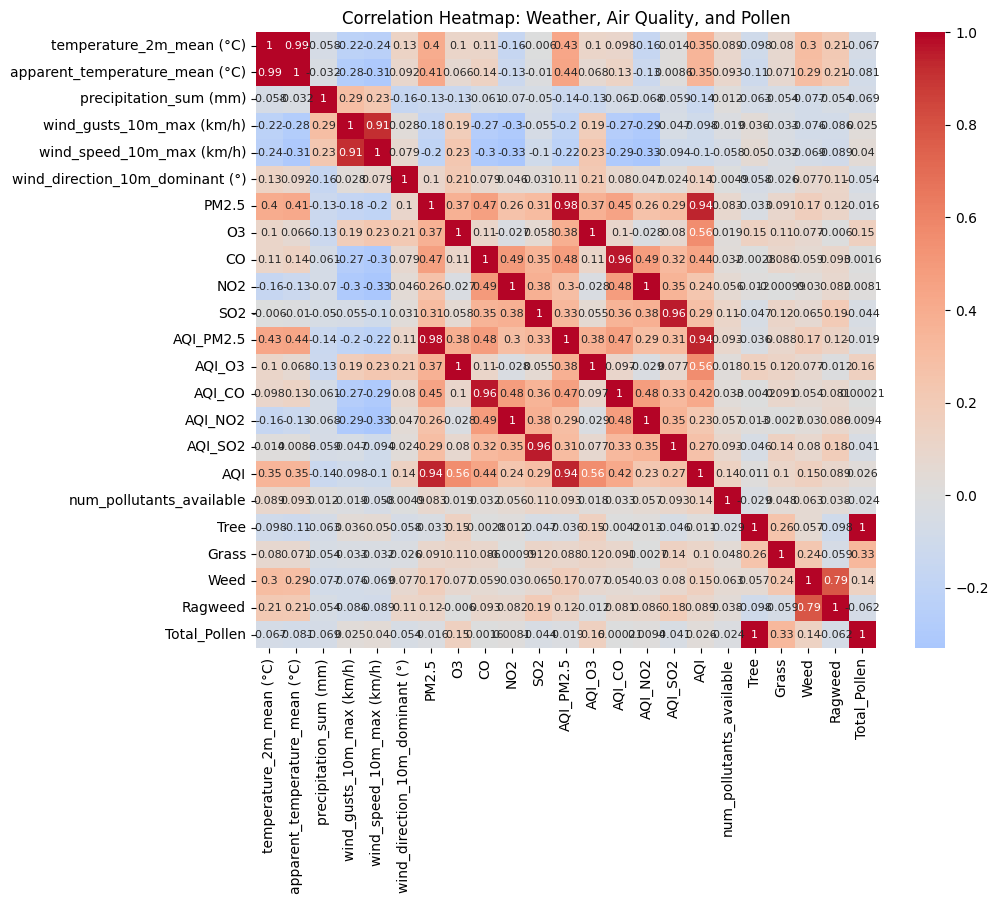

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 8} )
plt.title("Correlation Heatmap: Weather, Air Quality, and Pollen")
plt.show()

We also plot a filtered heatmap of **strong correlations** (absolute value > 0.4) to focus on more meaningful relationships.

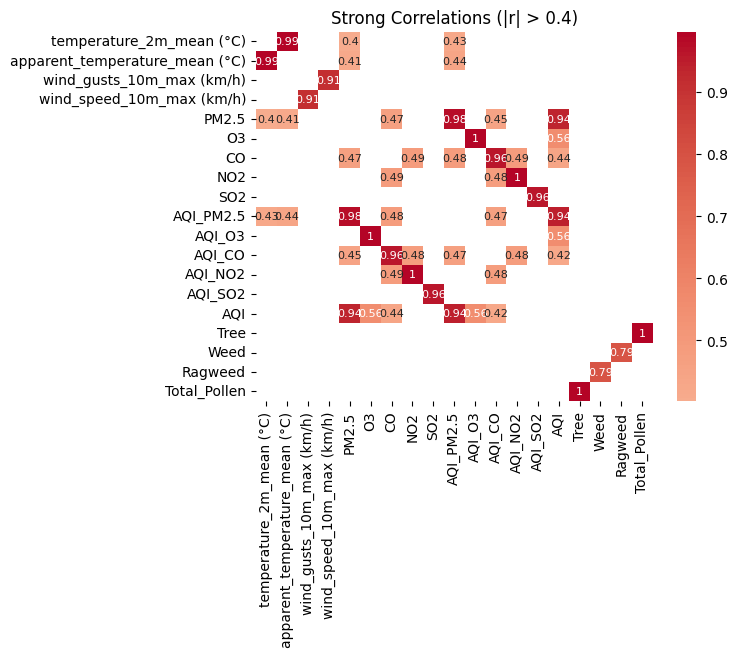

In [46]:
strong_corr = corr[(corr.abs() > 0.4) & (corr != 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 8} )
plt.title("Strong Correlations (|r| > 0.4)")
plt.show()

## 6. Lagged Features and Spearman Correlations
We create lagged weather variables (1–3 days) to examine delayed effects on pollen and AQI. Spearman correlation is used for monotonic relationships.

['Date', 'temperature_2m_mean (°C)', 'precipitation_sum (mm)', 'apparent_temperature_mean (°C)', 'wind_gusts_10m_max (km/h)', 'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)', 'PM2.5', 'O3', 'CO', 'NO2', 'SO2', 'AQI_PM2.5', 'AQI_O3', 'AQI_CO', 'AQI_NO2', 'AQI_SO2', 'AQI', 'AQI_Category', 'num_pollutants_available', 'Year', 'Month', 'Day', 'Week', 'Tree_Level', 'Grass_Level', 'Weed_Level', 'Ragweed_Level', 'Tree', 'Grass', 'Weed', 'Ragweed', 'Total_Pollen', 'OBJECTID', 'Total_Pollen_lag1', 'Total_Pollen_lag2', 'Total_Pollen_lag3', 'temperature_2m_mean (°C)_lag1', 'temperature_2m_mean (°C)_lag2', 'temperature_2m_mean (°C)_lag3', 'apparent_temperature_mean (°C)_lag1', 'apparent_temperature_mean (°C)_lag2', 'apparent_temperature_mean (°C)_lag3', 'precipitation_sum (mm)_lag1', 'precipitation_sum (mm)_lag2', 'precipitation_sum (mm)_lag3', 'wind_gusts_10m_max (km/h)_lag1', 'wind_gusts_10m_max (km/h)_lag2', 'wind_gusts_10m_max (km/h)_lag3', 'wind_speed_10m_max (km/h)_lag1', 'wind

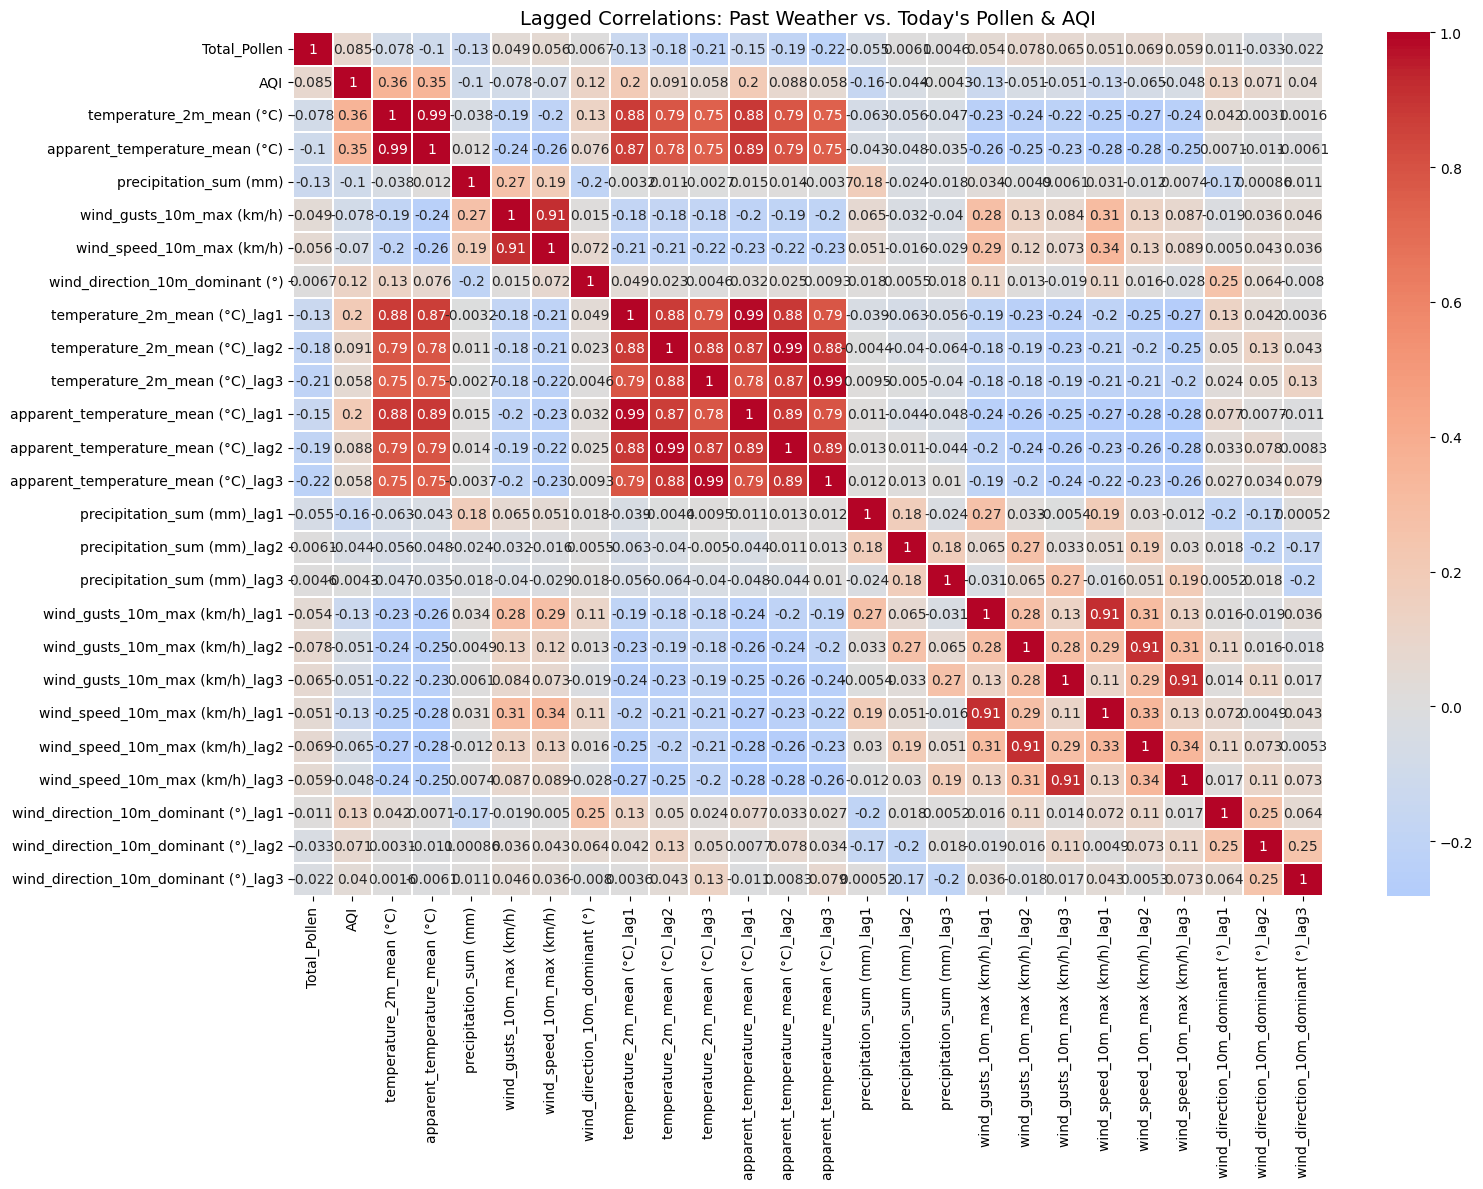

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Weather variables to lag
# -----------------------------
weather_vars = [
    'temperature_2m_mean (°C)',
    'apparent_temperature_mean (°C)',
    'precipitation_sum (mm)',
    'wind_gusts_10m_max (km/h)',
    'wind_speed_10m_max (km/h)',
    'wind_direction_10m_dominant (°)',
]

# -----------------------------
# Create lagged versions (1–3 days)
# -----------------------------
for var in weather_vars:
    for lag in [1, 2, 3]:
        merged[f'{var}_lag{lag}'] = merged[var].shift(lag)

print(merged.columns.tolist())

# -----------------------------
# Select columns for correlation
# -----------------------------
target_vars = ['Total_Pollen', 'AQI']
lag_cols = target_vars + weather_vars + [
    f'{var}_lag{lag}' for var in weather_vars for lag in [1, 2, 3]
]

# Keep only columns that exist
lag_numeric = merged[[c for c in lag_cols if c in merged.columns]]

# -----------------------------
# Drop NaN rows (after shifting)
# -----------------------------
lag_numeric_clean = lag_numeric.dropna()

# -----------------------------
# Compute correlation (Spearman)
# -----------------------------
lag_corr = lag_numeric_clean.corr(method='spearman')

# -----------------------------
# Plot heatmap
# -----------------------------
plt.figure(figsize=(16, 12))
sns.heatmap(
    lag_corr,
    annot=True,           # turn off numbers if it's too cluttered
    cmap='coolwarm',
    center=0,
    linewidths=0.2
)
plt.title("Lagged Correlations: Past Weather vs. Today's Pollen & AQI", fontsize=14)
plt.tight_layout()
plt.show()


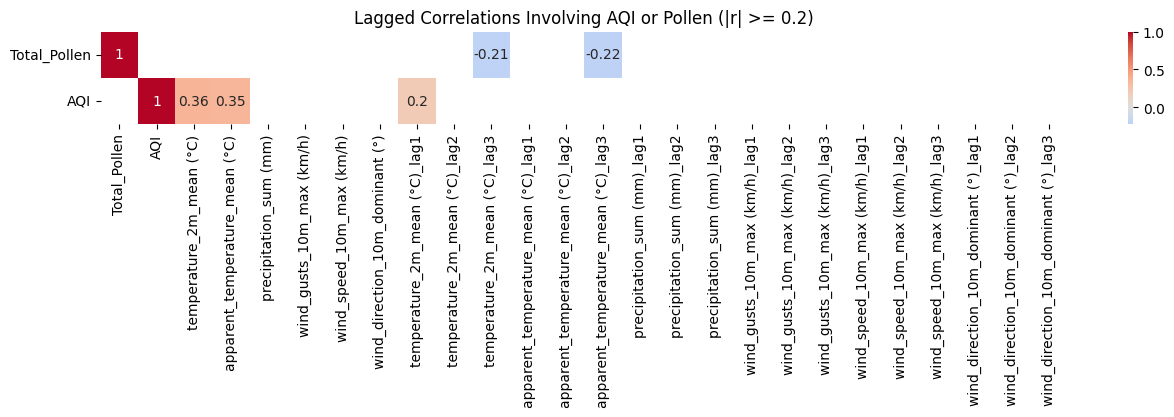

In [49]:
# Select rows involving AQI or Pollen
rows_of_interest = [c for c in lag_corr.index if 'AQI' in c or 'Pollen' in c]

# Keep correlations with all variables, then mask by threshold
strong_corr_filtered = lag_corr.loc[rows_of_interest, :]
strong_corr_filtered = strong_corr_filtered.where(strong_corr_filtered.abs() >= 0.2)

plt.figure(figsize=(len(strong_corr_filtered.columns)*0.6, len(strong_corr_filtered.index)*0.6))
sns.heatmap(strong_corr_filtered, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 10})
plt.title("Lagged Correlations Involving AQI or Pollen (|r| >= 0.2)")
plt.show()


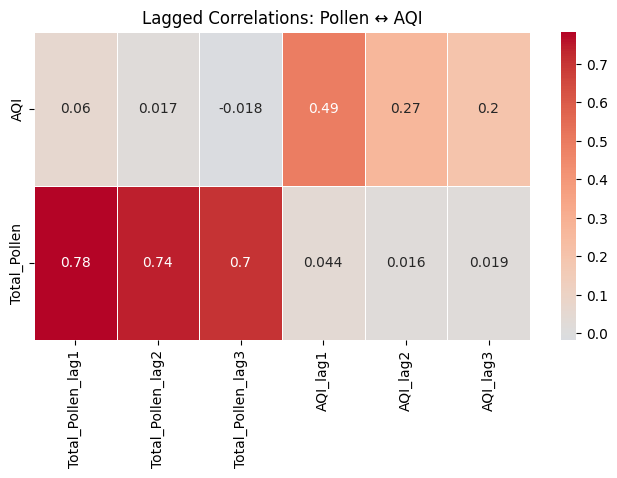

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Create lagged Total_Pollen and AQI (1–3 days)
# -----------------------------
for lag in [1, 2, 3]:
    merged[f'Total_Pollen_lag{lag}'] = merged['Total_Pollen'].shift(lag)
    merged[f'AQI_lag{lag}'] = merged['AQI'].shift(lag)

# -----------------------------
# Select columns for lagged correlations
# -----------------------------
lag_vars = [
    'Total_Pollen', 'AQI',
    'Total_Pollen_lag1', 'Total_Pollen_lag2', 'Total_Pollen_lag3',
    'AQI_lag1', 'AQI_lag2', 'AQI_lag3'
]

# Keep only existing columns
lag_numeric = merged[[c for c in lag_vars if c in merged.columns]]

# Drop rows with NaNs (due to lagging)
lag_numeric_clean = lag_numeric.dropna()

# Compute Spearman correlation
lag_corr = lag_numeric_clean.corr(method='spearman')

# -----------------------------
# Filter only correlations between AQI and lagged pollen, and pollen and lagged AQI
# -----------------------------
# Create mask for relevant correlations
mask = [
    (('AQI' in row and 'Total_Pollen_lag' in col) or 
     ('Total_Pollen' in row and 'AQI_lag' in col))
    for row in lag_corr.index for col in lag_corr.columns
]

# Or simpler: just select rows/columns we care about
lag_corr_filtered = lag_corr.loc[
    ['AQI', 'Total_Pollen'],
    ['Total_Pollen_lag1','Total_Pollen_lag2','Total_Pollen_lag3',
     'AQI_lag1','AQI_lag2','AQI_lag3']
]

# -----------------------------
# Plot heatmap
# -----------------------------
plt.figure(figsize=(8, 4))
sns.heatmap(
    lag_corr_filtered,
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    annot_kws={"size":10}
)
plt.title("Lagged Correlations: Pollen ↔ AQI")
plt.show()


## 7. Scatterplots: Pollen / AQI vs Lagged Precipitation

We explored the relationship between precipitation and pollen/AQI for lags 0–3 days.

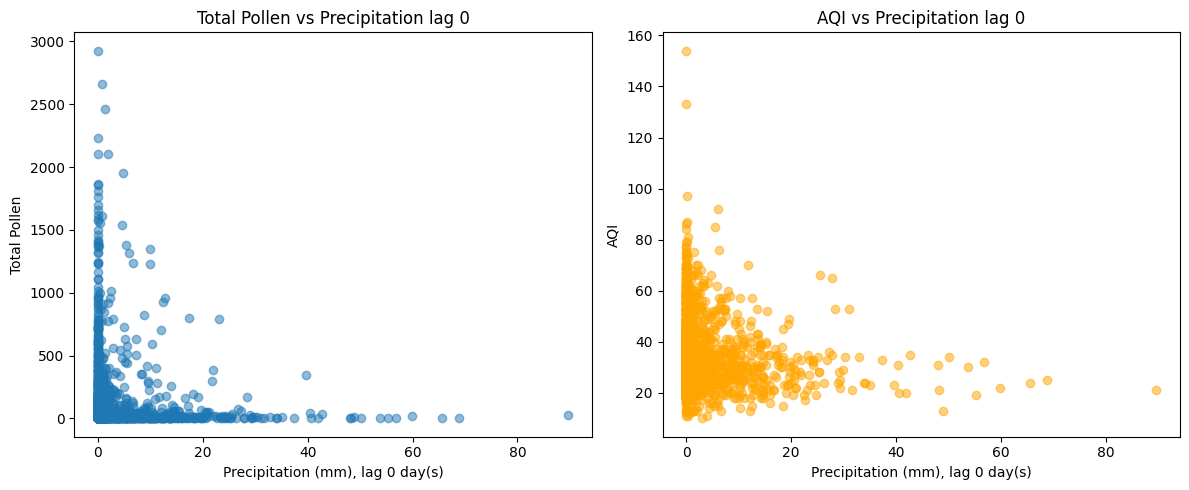

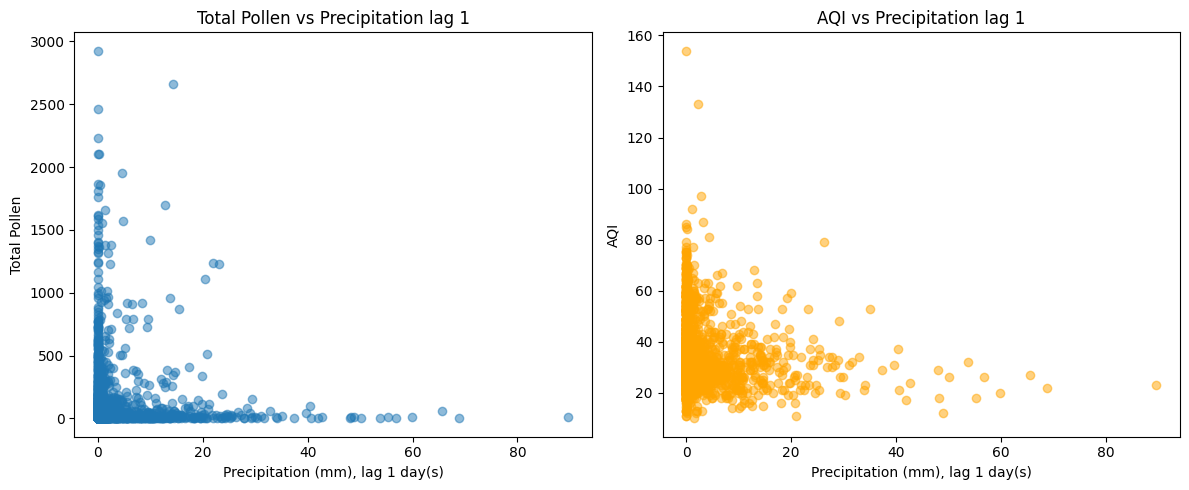

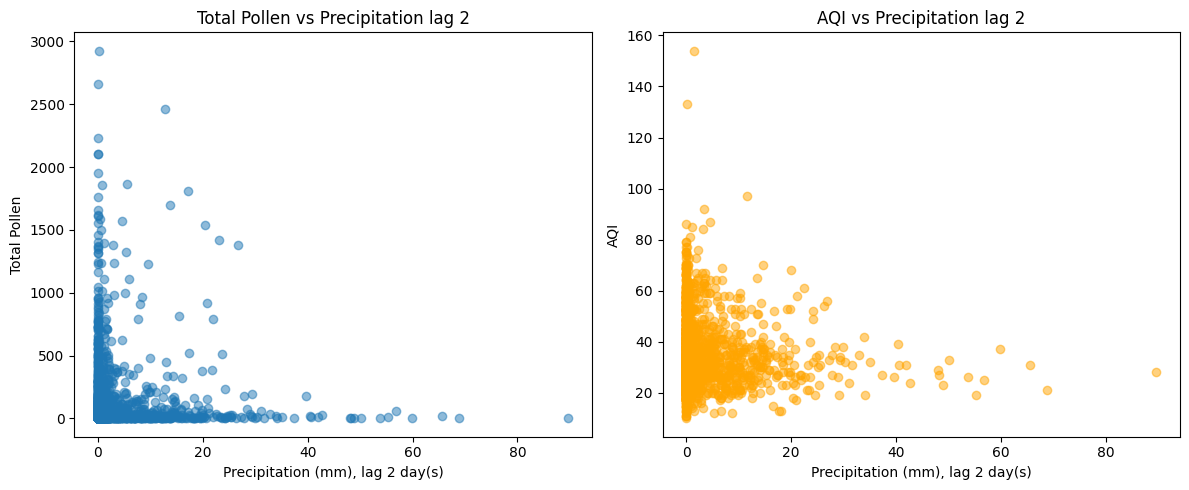

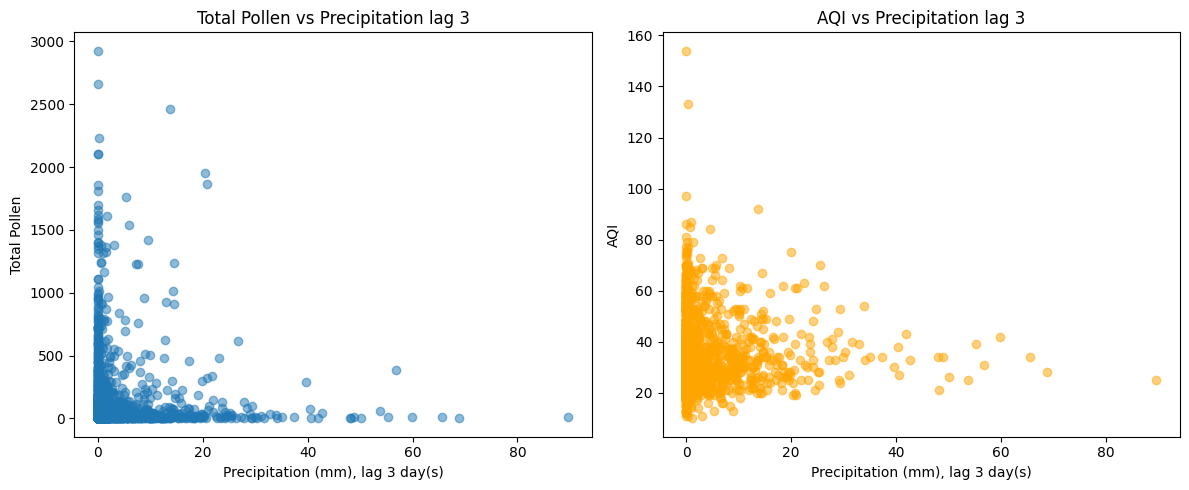

In [54]:
# -----------------------------
# Filter to pollen season (March–September)
# -----------------------------
# -----------------------------
# Filter to pollen season (March–September)
# -----------------------------
merged['Month'] = merged['Date'].dt.month
pollen_season = merged[(merged['Month'] >= 3) & (merged['Month'] <= 9)].copy()

# -----------------------------
# Create lagged precipitation columns
# -----------------------------
for lag in [0, 1, 2, 3]:  # 0 = same day, 1 = yesterday, etc.
    pollen_season[f'precip_lag{lag}'] = pollen_season['precipitation_sum (mm)'].shift(lag)

# -----------------------------
# Drop rows with NaNs created by lag
# -----------------------------
pollen_season_clean = pollen_season.dropna(
    subset=[f'precip_lag{lag}' for lag in [0,1,2,3]] + ['Total_Pollen', 'AQI']
)

# -----------------------------
# Plot scatterplots
# -----------------------------
for lag in [0, 1, 2, 3]:
    plt.figure(figsize=(12, 5))
    
    # Pollen vs lagged precipitation
    plt.subplot(1, 2, 1)
    plt.scatter(pollen_season_clean[f'precip_lag{lag}'], pollen_season_clean['Total_Pollen'], alpha=0.5)
    plt.xlabel(f'Precipitation (mm), lag {lag} day(s)')
    plt.ylabel('Total Pollen')
    plt.title(f'Total Pollen vs Precipitation lag {lag}')
    
    # AQI vs lagged precipitation
    plt.subplot(1, 2, 2)
    plt.scatter(pollen_season_clean[f'precip_lag{lag}'], pollen_season_clean['AQI'], alpha=0.5, color='orange')
    plt.xlabel(f'Precipitation (mm), lag {lag} day(s)')
    plt.ylabel('AQI')
    plt.title(f'AQI vs Precipitation lag {lag}')
    
    plt.tight_layout()
    plt.show()



--- Lag 0 day(s) ---


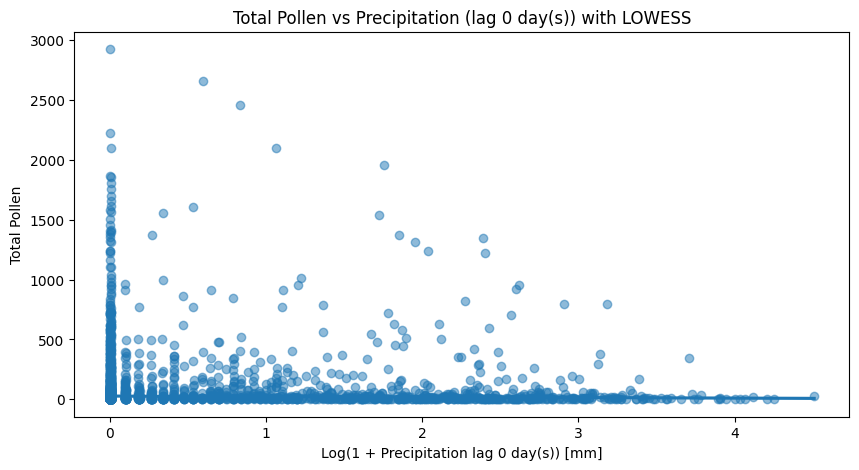

Counts per bin: precip_bin_lag0
(0, 1]       352
(1, 5]       299
(5, 10]      150
(10, 20]     125
(20, 100]     62
Name: count, dtype: int64


/var/folders/6t/7kv52nrn3kzd4lp1byvq03n00000gn/T/ipykernel_60008/228832654.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pollen_clean.groupby(f'precip_bin_lag{lag}')['Total_Pollen'].mean(),


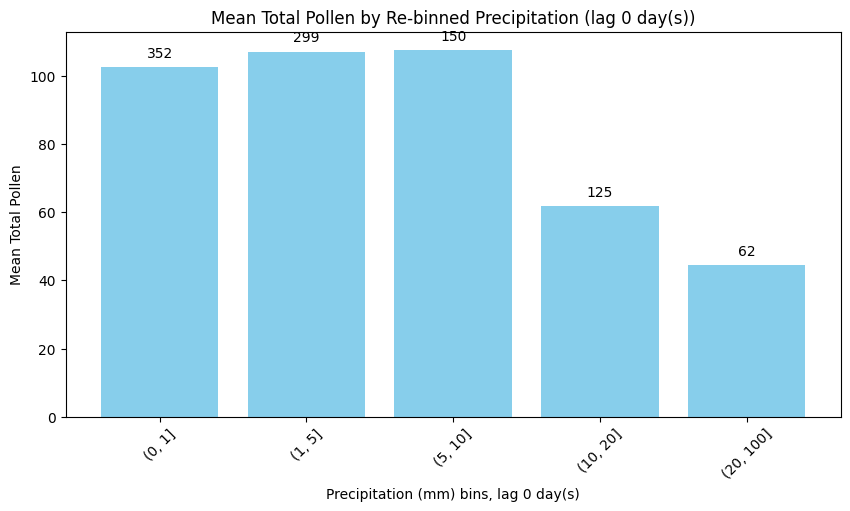


--- Lag 1 day(s) ---


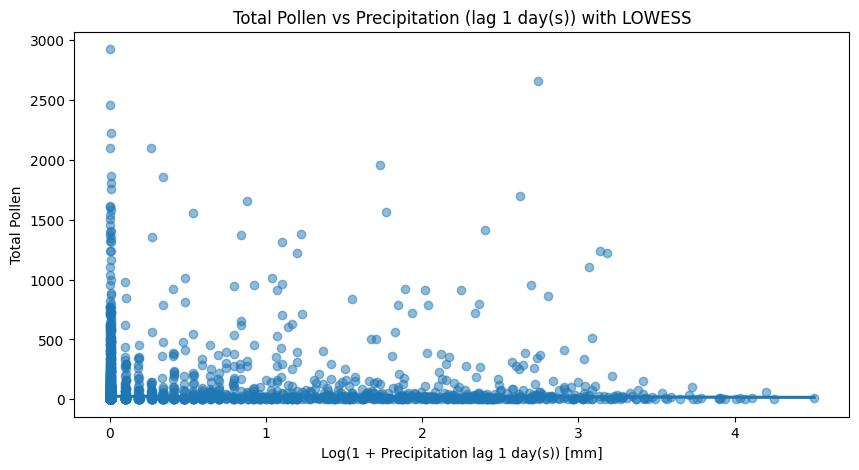

Counts per bin: precip_bin_lag1
(0, 1]       352
(1, 5]       299
(5, 10]      150
(10, 20]     125
(20, 100]     62
Name: count, dtype: int64


/var/folders/6t/7kv52nrn3kzd4lp1byvq03n00000gn/T/ipykernel_60008/228832654.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pollen_clean.groupby(f'precip_bin_lag{lag}')['Total_Pollen'].mean(),


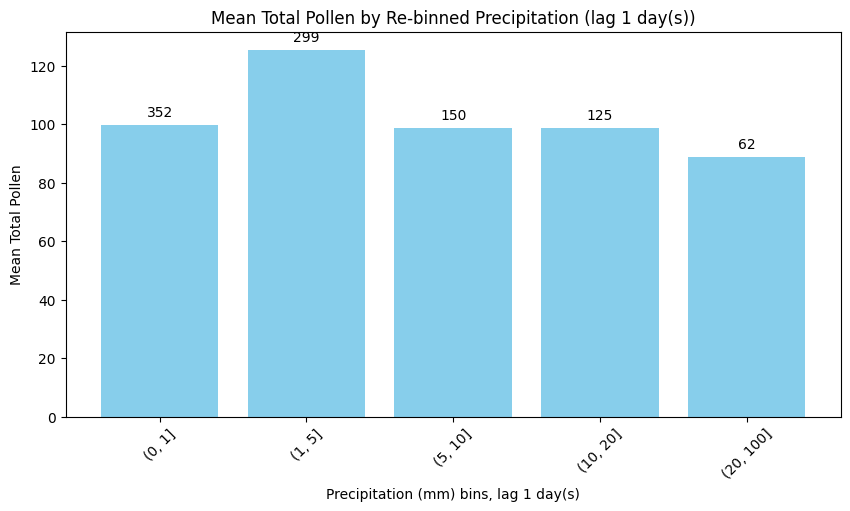


--- Lag 2 day(s) ---


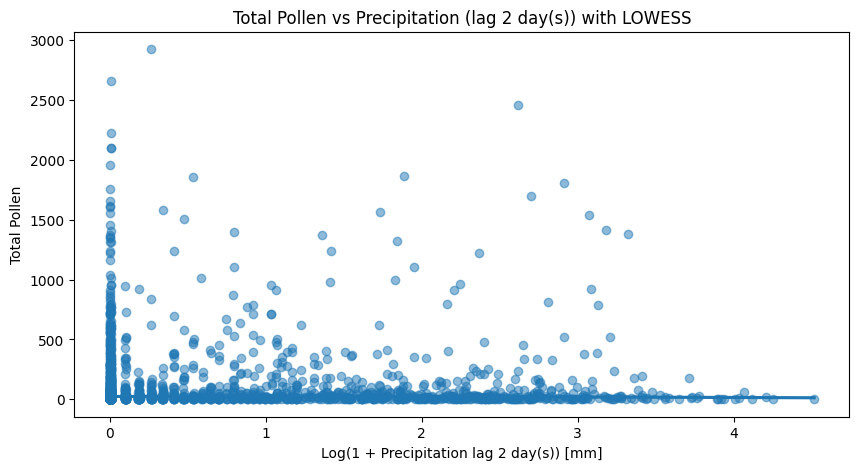

Counts per bin: precip_bin_lag2
(0, 1]       352
(1, 5]       299
(5, 10]      150
(10, 20]     125
(20, 100]     62
Name: count, dtype: int64


/var/folders/6t/7kv52nrn3kzd4lp1byvq03n00000gn/T/ipykernel_60008/228832654.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pollen_clean.groupby(f'precip_bin_lag{lag}')['Total_Pollen'].mean(),


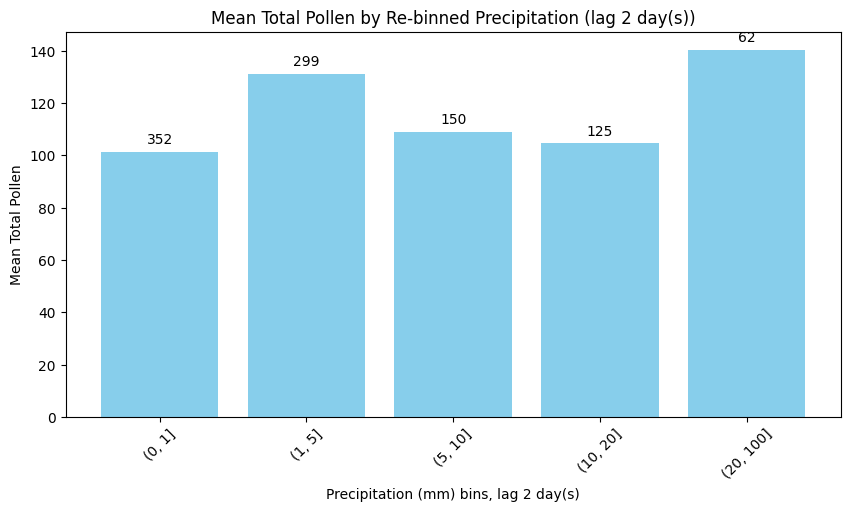


--- Lag 3 day(s) ---


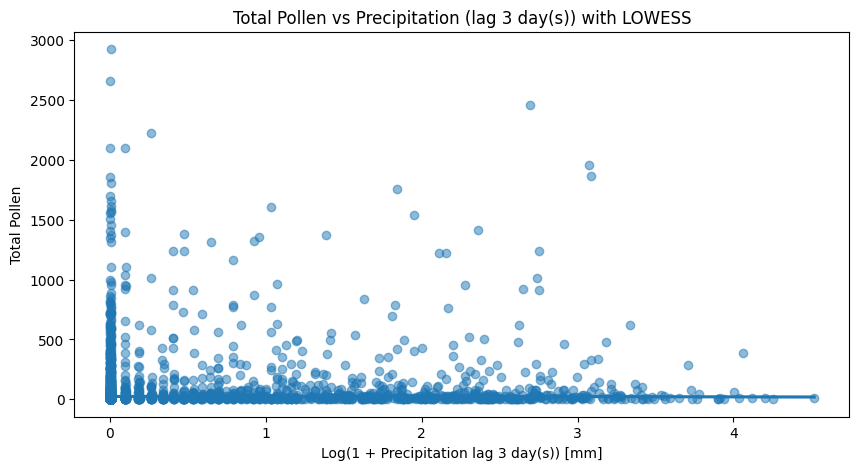

Counts per bin: precip_bin_lag3
(0, 1]       351
(1, 5]       299
(5, 10]      150
(10, 20]     125
(20, 100]     62
Name: count, dtype: int64


/var/folders/6t/7kv52nrn3kzd4lp1byvq03n00000gn/T/ipykernel_60008/228832654.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pollen_clean.groupby(f'precip_bin_lag{lag}')['Total_Pollen'].mean(),


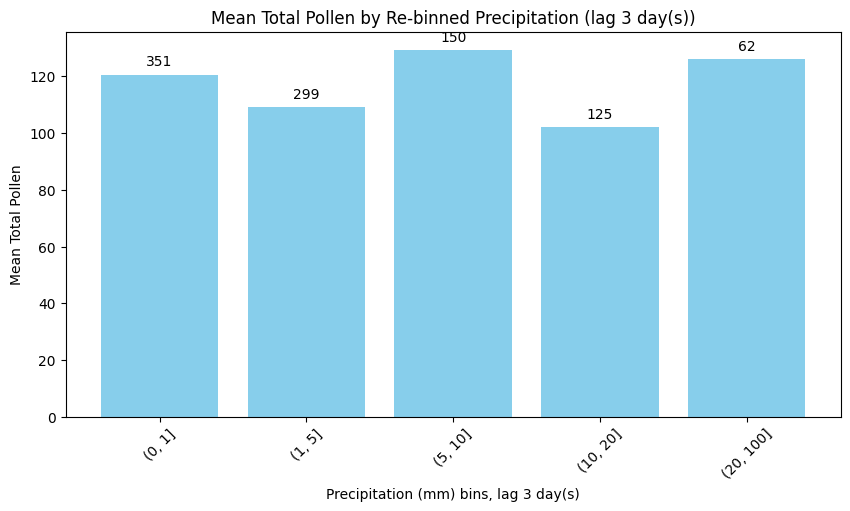

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Filter to pollen season (March–September)
# -----------------------------
merged['Month'] = merged['Date'].dt.month
pollen_season = merged[(merged['Month'] >= 3) & (merged['Month'] <= 9)].copy()

# -----------------------------
# Define lags to explore
# -----------------------------
lags = [0, 1, 2, 3]  # 0 = no lag, 2-day lag, 3-day lag

for lag in lags:
    print(f"\n--- Lag {lag} day(s) ---")
    
    # Create lagged precipitation
    if lag == 0:
        pollen_season[f'precip_lag{lag}'] = pollen_season['precipitation_sum (mm)']
    else:
        pollen_season[f'precip_lag{lag}'] = pollen_season['precipitation_sum (mm)'].shift(lag)
    
    # Drop NaNs caused by lag
    pollen_clean = pollen_season.dropna(subset=[f'precip_lag{lag}', 'Total_Pollen']).copy()
    
    # Log-transform precipitation
    pollen_clean[f'precip_lag{lag}_log'] = np.log1p(pollen_clean[f'precip_lag{lag}'])
    
    # Add tiny jitter to avoid LOWESS RuntimeError
    pollen_clean[f'precip_lag{lag}_log_jitter'] = (
        pollen_clean[f'precip_lag{lag}_log'] + np.random.uniform(0, 0.01, size=len(pollen_clean))
    )
    
    # -----------------------------
    # Scatterplot with LOWESS
    # -----------------------------
    plt.figure(figsize=(10, 5))
    sns.regplot(
        x=f'precip_lag{lag}_log_jitter', 
        y='Total_Pollen', 
        data=pollen_clean, 
        lowess=True, 
        scatter_kws={'alpha':0.5}
    )
    plt.xlabel(f'Log(1 + Precipitation lag {lag} day(s)) [mm]')
    plt.ylabel('Total Pollen')
    plt.title(f'Total Pollen vs Precipitation (lag {lag} day(s)) with LOWESS')
    plt.show()
    
    # -----------------------------
    # Re-bin precipitation based on actual counts
    # -----------------------------
    new_bins = [0, 1, 5, 10, 20, 100]
    pollen_clean[f'precip_bin_lag{lag}'] = pd.cut(pollen_clean[f'precip_lag{lag}'], new_bins)
    
    bin_counts_new = pollen_clean[f'precip_bin_lag{lag}'].value_counts().sort_index()
    print("Counts per bin:", bin_counts_new)
    
    # -----------------------------
    # Bar chart of mean pollen per bin
    # -----------------------------
    plt.figure(figsize=(10, 5))
    bars = plt.bar(
        bin_counts_new.index.astype(str),
        pollen_clean.groupby(f'precip_bin_lag{lag}')['Total_Pollen'].mean(),
        color='skyblue'
    )
    plt.xlabel(f'Precipitation (mm) bins, lag {lag} day(s)')
    plt.ylabel('Mean Total Pollen')
    plt.title(f'Mean Total Pollen by Re-binned Precipitation (lag {lag} day(s))')
    
    # Annotate number of days on top of bars
    for bar, count in zip(bars, bin_counts_new):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 2,
            str(count),
            ha='center',
            va='bottom',
            fontsize=10
        )
    
    plt.xticks(rotation=45)
    plt.show()


## 8. Cumulative Precipitation Effects

We examine cumulative precipitation over past lag+1 days using LOWESS smoothing and binned bar charts

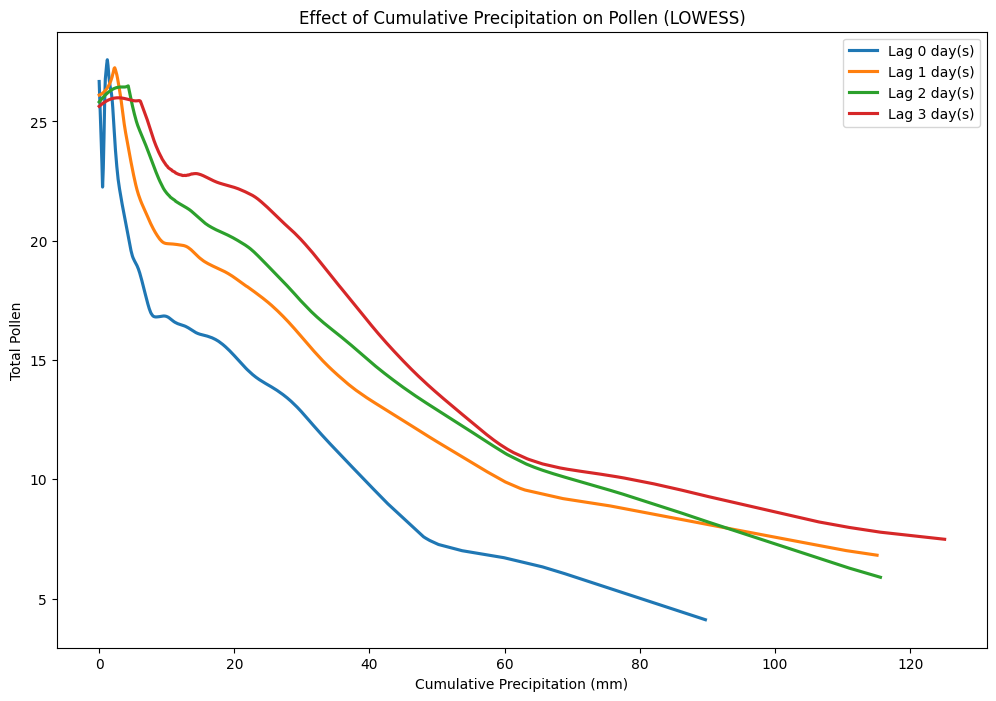

/var/folders/6t/7kv52nrn3kzd4lp1byvq03n00000gn/T/ipykernel_60008/1492814131.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_pollen = pollen_season_clean.groupby(f'precip_bin_lag{lag}')['Total_Pollen'].mean()
/var/folders/6t/7kv52nrn3kzd4lp1byvq03n00000gn/T/ipykernel_60008/1492814131.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_pollen = pollen_season_clean.groupby(f'precip_bin_lag{lag}')['Total_Pollen'].mean()
/var/folders/6t/7kv52nrn3kzd4lp1byvq03n00000gn/T/ipykernel_60008/1492814131.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futur

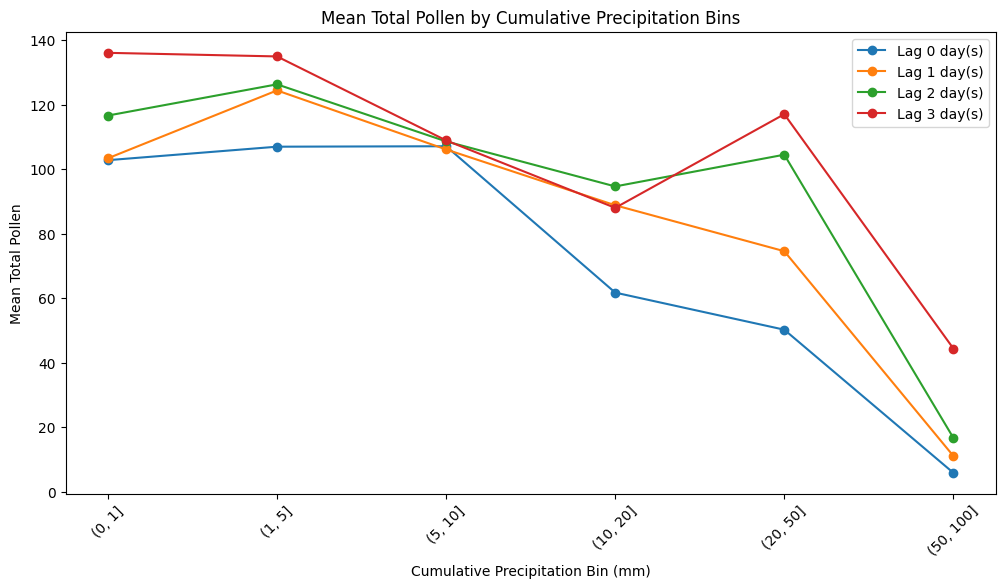

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Filter to pollen season (March–September)
# -----------------------------
merged['Month'] = merged['Date'].dt.month
pollen_season = merged[(merged['Month'] >= 3) & (merged['Month'] <= 9)].copy()

# -----------------------------
# Create cumulative precipitation columns for 0, 1, 2, 3-day lags
# -----------------------------
for lag in [0, 1, 2, 3]:
    # cumulate precipitation over the past lag+1 days
    col_name = f'precip_cum_lag{lag}'
    pollen_season[col_name] = pollen_season['precipitation_sum (mm)'].rolling(window=lag+1).sum()

# Drop rows with missing values
lag_cols = [f'precip_cum_lag{lag}' for lag in [0,1,2,3]]
pollen_season_clean = pollen_season.dropna(subset=lag_cols + ['Total_Pollen']).copy()

# -----------------------------
# Plot LOWESS for each cumulative lag
# -----------------------------
plt.figure(figsize=(12, 8))

for lag in [0, 1, 2, 3]:
    col_name = f'precip_cum_lag{lag}'
    # add tiny jitter to avoid LOWESS errors
    jittered = pollen_season_clean[col_name] + np.random.uniform(0, 0.01, size=len(pollen_season_clean))
    sns.regplot(
        x=jittered,
        y=pollen_season_clean['Total_Pollen'],
        lowess=True,
        scatter=False,
        label=f'Lag {lag} day(s)'
    )

plt.xlabel('Cumulative Precipitation (mm)')
plt.ylabel('Total Pollen')
plt.title('Effect of Cumulative Precipitation on Pollen (LOWESS)')
plt.legend()
plt.show()

# -----------------------------
# Optional: bin precipitation and show mean pollen per bin for each lag
# -----------------------------
bins = [0, 1, 5, 10, 20, 50, 100]
plt.figure(figsize=(12, 6))
for lag in [0, 1, 2, 3]:
    col_name = f'precip_cum_lag{lag}'
    pollen_season_clean[f'precip_bin_lag{lag}'] = pd.cut(pollen_season_clean[col_name], bins)
    mean_pollen = pollen_season_clean.groupby(f'precip_bin_lag{lag}')['Total_Pollen'].mean()
    plt.plot(mean_pollen.index.astype(str), mean_pollen.values, marker='o', label=f'Lag {lag} day(s)')

plt.xticks(rotation=45)
plt.xlabel('Cumulative Precipitation Bin (mm)')
plt.ylabel('Mean Total Pollen')
plt.title('Mean Total Pollen by Cumulative Precipitation Bins')
plt.legend()
plt.show()


## 9. KMeans++ Clustering

We cluster weather → pollen, weather → AQI, and AQI ↔ pollen relationships. PCA reduces dimensions for visualization.

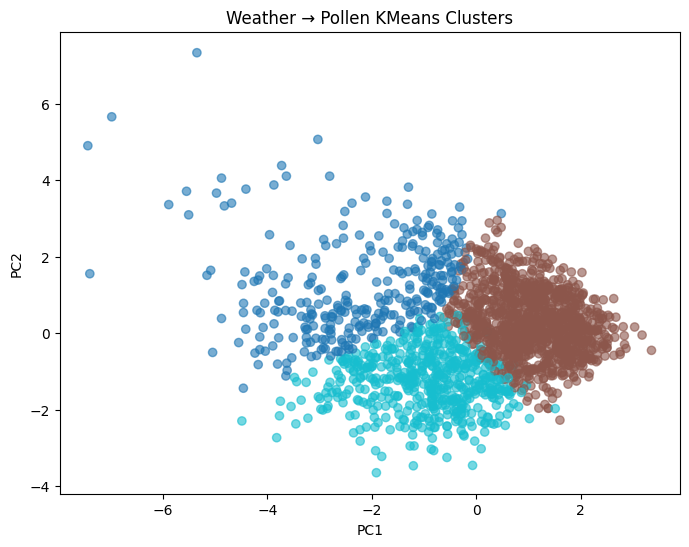


Weather → Pollen Cluster Means:
          temperature_2m_mean (°C)  apparent_temperature_mean (°C)  \
cluster                                                             
0                       13.907029                       11.512780   
1                       21.793082                       22.547080   
2                        9.714549                        6.773297   

         precipitation_sum (mm)  wind_gusts_10m_max (km/h)  \
cluster                                                      
0                      9.747284                  56.440895   
1                      1.796316                  34.325606   
2                      1.411971                  37.623204   

         wind_speed_10m_max (km/h)  Total_Pollen  
cluster                                           
0                        28.003195    104.963259  
1                        17.176011     50.466352  
2                        18.922284    251.874917  


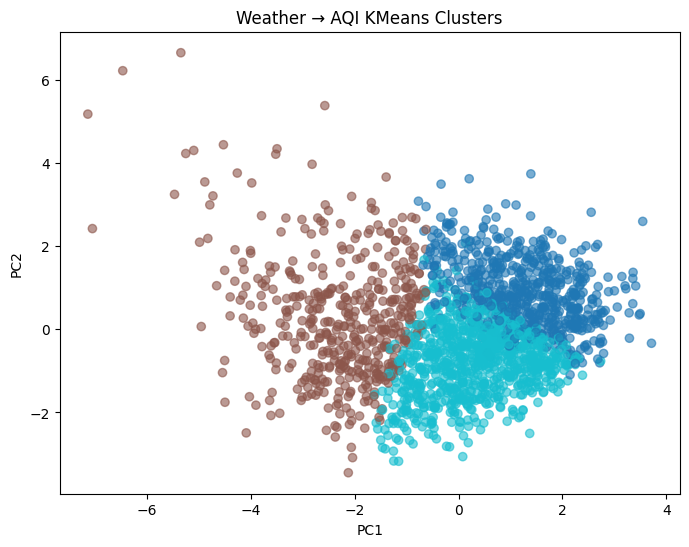


Weather → AQI Cluster Means:
          temperature_2m_mean (°C)  apparent_temperature_mean (°C)  \
cluster                                                             
0                       23.581340                       24.736204   
1                        9.838330                        6.432120   
2                       16.575543                       15.843314   

         precipitation_sum (mm)  wind_gusts_10m_max (km/h)  \
cluster                                                      
0                      1.904944                  37.874322   
1                      6.368522                  51.326124   
2                      1.883886                  32.666629   

         wind_speed_10m_max (km/h)        AQI  
cluster                                        
0                        18.883573  47.653907  
1                        25.787580  30.372591  
2                        16.313029  28.698286  


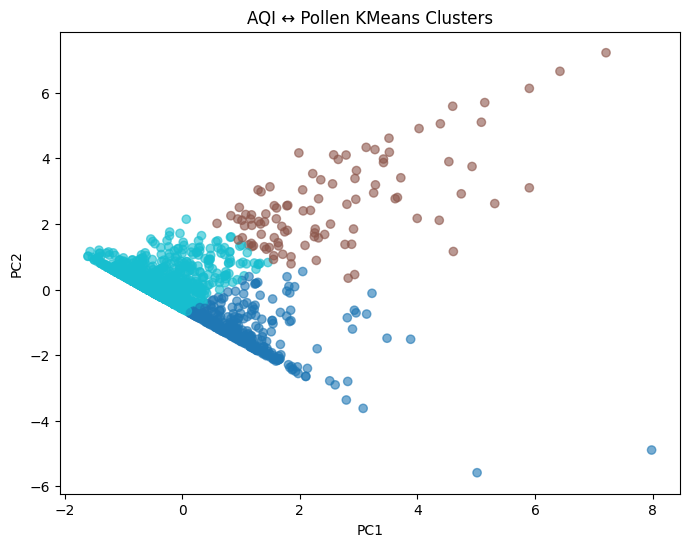


AQI ↔ Pollen Cluster Means:
                AQI  Total_Pollen
cluster                         
0        54.784360     67.510190
1        34.367347   1117.139592
2        29.459627     60.608454


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# -----------------------------
# 1. Define feature sets
# -----------------------------
weather_vars = [
    'temperature_2m_mean (°C)',
    'apparent_temperature_mean (°C)',
    'precipitation_sum (mm)',
    'wind_gusts_10m_max (km/h)',
    'wind_speed_10m_max (km/h)'
]

# Make sure your cleaned dataset exists
df = pollen_season_clean.copy()

# -----------------------------
# Helper function to cluster and plot
# -----------------------------
def cluster_and_plot(df, features, n_clusters=3, title_prefix=""):
    X = df[features].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    X['cluster'] = labels
    
    # PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', alpha=0.6)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'{title_prefix} KMeans Clusters')
    plt.show()
    
    # Show cluster means
    cluster_summary = X.groupby('cluster')[features].mean()
    print(f"\n{title_prefix} Cluster Means:\n", cluster_summary)
    
    return X, cluster_summary

# -----------------------------
# 2. Weather → Pollen
# -----------------------------
features_weather_pollen = weather_vars + ['Total_Pollen']
cluster_wp, summary_wp = cluster_and_plot(df, features_weather_pollen, n_clusters=3, title_prefix="Weather → Pollen")

# -----------------------------
# 3. Weather → AQI
# -----------------------------
features_weather_aqi = weather_vars + ['AQI']
cluster_wa, summary_wa = cluster_and_plot(df, features_weather_aqi, n_clusters=3, title_prefix="Weather → AQI")

# -----------------------------
# 4. AQI ↔ Pollen
# -----------------------------
features_aqi_pollen = ['AQI', 'Total_Pollen']
cluster_ap, summary_ap = cluster_and_plot(df, features_aqi_pollen, n_clusters=3, title_prefix="AQI ↔ Pollen")


# KMeans++ Cluster Analysis Summary

## 1️⃣ Weather → Pollen Clusters

Using k-means++ clustering on weather features and total pollen, we identified **three clusters** representing different weather conditions and their associated pollen levels:

| Cluster | Temp (°C) | Apparent Temp (°C) | Precip (mm) | Wind Gust (km/h) | Wind Speed (km/h) | Total Pollen | Interpretation |
|--------|------------|------------------|-------------|-----------------|-----------------|--------------|----------------|
| 0      | 13.9       | 11.5             | 9.7         | 56.4            | 28.0            | 105          | Moderate temperature and rainfall with strong winds → medium pollen levels. |
| 1      | 21.8       | 22.5             | 1.8         | 34.3            | 17.2            | 50           | Warm, dry, and calm → relatively low pollen levels. |
| 2      | 9.7        | 6.8              | 1.4         | 37.6            | 18.9            | 252          | Cool, dry conditions with moderate wind → high pollen levels. |

**Key takeaway:** Pollen peaks in cooler, dry conditions rather than warm or rainy weather.

---

## 2️⃣ Weather → AQI Clusters

Clustering weather features against AQI reveals how different weather conditions influence air quality:

| Cluster | Temp (°C) | Apparent Temp (°C) | Precip (mm) | Wind Gust (km/h) | Wind Speed (km/h) | AQI | Interpretation |
|--------|------------|------------------|-------------|-----------------|-----------------|-----|----------------|
| 0      | 23.6       | 24.7             | 1.9         | 37.9            | 18.9            | 47.7 | Hot, dry conditions → higher AQI. |
| 1      | 9.8        | 6.4              | 6.4         | 51.3            | 25.8            | 30.4 | Cool, rainy, and windy → lower AQI. |
| 2      | 16.6       | 15.8             | 1.9         | 32.7            | 16.3            | 28.7 | Mild and dry conditions → moderate AQI. |

**Key takeaway:** AQI tends to increase under hot, dry weather and is reduced by rain and stronger winds.

---

## 3️⃣ AQI ↔ Pollen Clusters

Clustering AQI against total pollen highlights the combined behavior of air quality and pollen counts:

| Cluster | AQI  | Total Pollen | Interpretation |
|--------|------|--------------|----------------|
| 0      | 54.8 | 67.5         | High AQI, medium pollen → poor air quality, moderate pollen. |
| 1      | 34.4 | 1117.1       | Moderate AQI, extremely high pollen → pollen spikes are not necessarily associated with poor air quality. |
| 2      | 29.5 | 60.6         | Low AQI, low pollen → good air quality, low pollen season. |

**Key takeaway:** Extremely high pollen events do not always coincide with poor air quality; other factors contribute to AQI.

---

**Overall Insights:**

1. **Weather is more predictive of pollen than AQI**: Pollen peaks in cooler, dry conditions.
2. **AQI is sensitive to hot and stagnant conditions** but not necessarily high pollen.
3. **Pollen and AQI clusters are largely independent**: High pollen doesn’t automatically imply poor air quality.


## 10. Elbow Method Checking to see how many clusters we should try

Elbow detected at k = 17 for Weather → Pollen


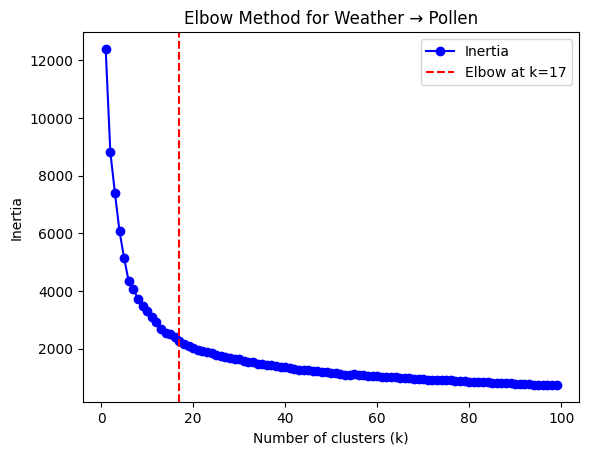

Elbow detected at k = 14 for Weather → AQI


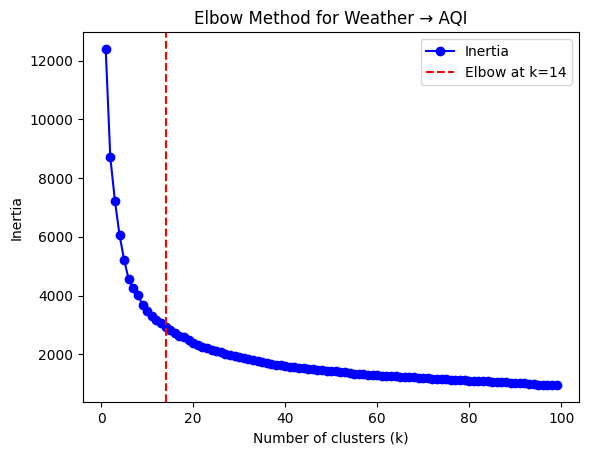

Elbow detected at k = 11 for AQI ↔ Pollen


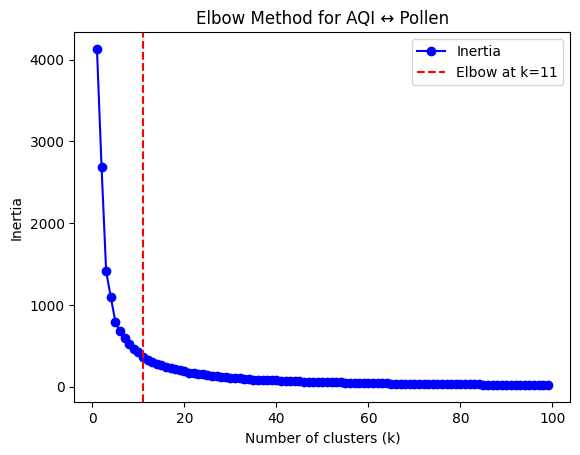

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator  # <- import KneeLocator


df = merged.copy()   # rename for convenience

# Define datasets for each relationship
datasets = {
    "Weather → Pollen": df[['temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)',
                            'precipitation_sum (mm)', 'wind_gusts_10m_max (km/h)',
                            'wind_speed_10m_max (km/h)', 'Total_Pollen']].dropna(),
    
    "Weather → AQI": df[['temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)',
                         'precipitation_sum (mm)', 'wind_gusts_10m_max (km/h)',
                         'wind_speed_10m_max (km/h)', 'AQI']].dropna(),
    
    "AQI ↔ Pollen": df[['AQI', 'Total_Pollen']].dropna()
}

# Standardize data
scalers = {name: StandardScaler().fit_transform(data) for name, data in datasets.items()}

# Elbow method to find best k automatically
for name, data_scaled in scalers.items():
    inertias = []
    K = range(1, 100)
    for k in K:
        km = KMeans(n_clusters=k, init='k-means++', random_state=42)
        km.fit(data_scaled)
        inertias.append(km.inertia_)

    # Detect the elbow
    kn = KneeLocator(K, inertias, curve='convex', direction='decreasing')
    elbow_k = kn.knee
    print(f"Elbow detected at k = {elbow_k} for {name}")

    # Plot
    plt.figure()
    plt.plot(K, inertias, 'bo-', label='Inertia')
    plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow at k={elbow_k}')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for {name}')
    plt.legend()
    plt.show()


## 11. Re-Running KMeans++


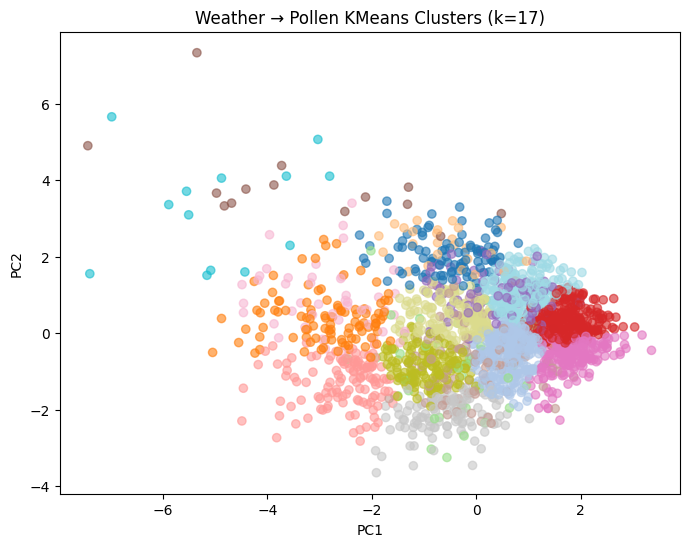


Weather → Pollen Cluster Means:
          temperature_2m_mean (°C)  apparent_temperature_mean (°C)  \
cluster                                                             
0                       23.319149                       23.639362   
1                       17.279323                       16.540977   
2                        9.968317                        5.694059   
3                       20.485185                       21.881481   
4                       16.391892                       14.983784   
5                       23.950187                       25.584270   
6                        3.487705                       -1.222131   
7                       20.700000                       22.149398   
8                       14.885714                       13.585714   
9                       16.152439                       14.884146   
10                      20.576271                       21.546328   
11                       9.091111                        6.026667   


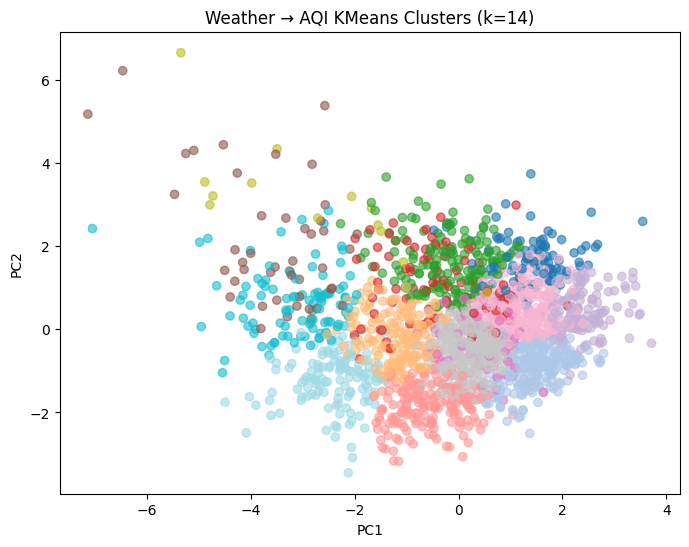


Weather → AQI Cluster Means:
          temperature_2m_mean (°C)  apparent_temperature_mean (°C)  \
cluster                                                             
0                       24.477670                       25.626214   
1                       20.216742                       20.986425   
2                       13.248295                       10.439773   
3                       22.593711                       22.687421   
4                       19.198876                       20.028090   
5                        8.850526                        6.202105   
6                       24.409722                       26.386111   
7                       10.493333                        7.384444   
8                       16.507767                       15.358252   
9                       23.738272                       24.921399   
10                      18.023828                       17.419531   
11                      16.478571                       15.992857   
12 

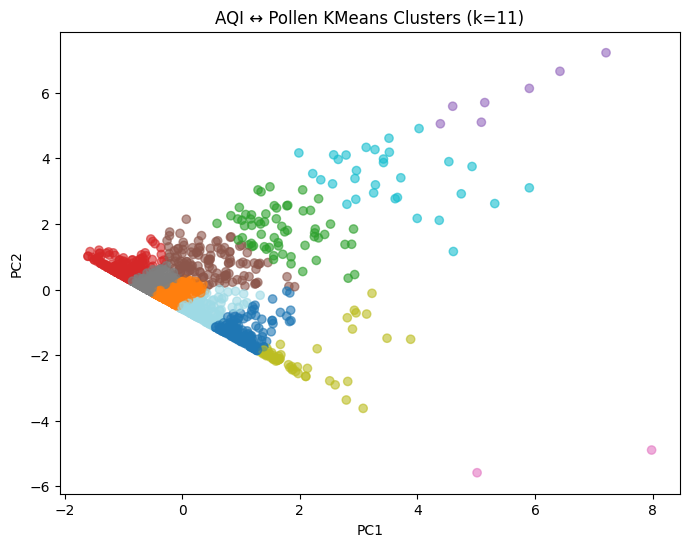


AQI ↔ Pollen Cluster Means:
                 AQI  Total_Pollen
cluster                          
0         56.205742     51.881818
1         35.020179     35.123834
2         34.049180    790.873770
3         20.549550     34.314324
4         31.571429   2347.428571
5         31.984252    367.497402
6        143.500000    359.500000
7         28.079060     33.159786
8         72.222222    104.722222
9         36.096774   1465.334839
10        43.974026     39.782684


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# -----------------------------
# 1. Define feature sets
# -----------------------------
weather_vars = [
    'temperature_2m_mean (°C)',
    'apparent_temperature_mean (°C)',
    'precipitation_sum (mm)',
    'wind_gusts_10m_max (km/h)',
    'wind_speed_10m_max (km/h)'
]

# Make sure your cleaned dataset exists
df = pollen_season_clean.copy()

# -----------------------------
# Helper function to cluster and plot
# -----------------------------
def cluster_and_plot(df, features, n_clusters=3, title_prefix=""):
    X = df[features].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
    labels = kmeans.fit_predict(X_scaled)
    X['cluster'] = labels
    
    # PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab20', alpha=0.6)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'{title_prefix} KMeans Clusters (k={n_clusters})')
    plt.show()
    
    # Show cluster means
    cluster_summary = X.groupby('cluster')[features].mean()
    print(f"\n{title_prefix} Cluster Means:\n", cluster_summary)
    
    return X, cluster_summary

# -----------------------------
# 2. Weather → Pollen
# -----------------------------
features_weather_pollen = weather_vars + ['Total_Pollen']
cluster_wp, summary_wp = cluster_and_plot(df, features_weather_pollen, n_clusters=17, title_prefix="Weather → Pollen")

# -----------------------------
# 3. Weather → AQI
# -----------------------------
features_weather_aqi = weather_vars + ['AQI']
cluster_wa, summary_wa = cluster_and_plot(df, features_weather_aqi, n_clusters=14, title_prefix="Weather → AQI")

# -----------------------------
# 4. AQI ↔ Pollen
# -----------------------------
features_aqi_pollen = ['AQI', 'Total_Pollen']
cluster_ap, summary_ap = cluster_and_plot(df, features_aqi_pollen, n_clusters=11, title_prefix="AQI ↔ Pollen")


## Weather → Pollen Cluster Summary

The KMeans clustering (k=17) identified distinct **weather regimes** and their typical **pollen levels**:

| Cluster | Avg Temp (°C) | Precip (mm) | Wind Gust (km/h) | Wind Speed (km/h) | Avg Pollen | Description |
|---------|---------------|-------------|-----------------|-----------------|------------|------------|
| 4       | 16.4          | 1.4         | 39              | 20              | 1640       | **Extreme pollen**: mild, dry, moderate wind |
| 9       | 16.2          | 1.8         | 36              | 18              | 709        | **High pollen**: mild, low precipitation |
| 2       | 9.7           | 1.4         | 58              | 30              | 178        | **Moderate pollen**: cool, windy, dry |
| 0       | 23.3          | 3.0         | 54              | 27              | 58         | **Medium pollen**: warm, some precipitation, moderate wind |
| 1       | 17.3          | 0.6         | 33              | 16              | 69         | **Medium pollen**: mild, dry, light wind |
| 8       | 14.9          | 54.5        | 59              | 29              | 10         | **Low pollen**: very rainy, moderate wind |
| 3       | 20.5          | 28.2        | 44              | 21              | 21         | **Low pollen**: warm, heavy rain, moderate wind |
| 6       | 3.5           | 1.5         | 46              | 24              | 20         | **Low pollen**: very cold, dry, windy |
| 5       | 24.0          | 0.9         | 31              | 16              | 29         | **Low pollen**: warm, dry, calm wind |
| 7       | 20.7          | 12.9        | 38              | 18              | 21         | **Low pollen**: warm, rainy, moderate wind |
| 10      | 20.6          | 0.9         | 25              | 12              | 25         | **Low pollen**: warm, dry, light wind |
| 11      | 9.1           | 19.2        | 56              | 26              | 56         | **Medium pollen**: cool, rainy, windy |
| 12      | 6.9           | 1.6         | 30              | 15              | 64         | **Medium pollen**: cold, dry, calm wind |
| 13      | 11.0          | 1.3         | 40              | 20              | 121        | **Moderate pollen**: cool, dry, moderate wind |
| 14      | 17.9          | 1.2         | 44              | 23              | 88         | **Medium pollen**: mild, dry, moderate wind |
| 15      | 12.3          | 11.8        | 87              | 40              | 71         | **Medium pollen**: cool, rainy, very windy |
| 16      | 24.5          | 1.0         | 41              | 20              | 29         | **Low pollen**: warm, dry, moderate wind |
| 0       | 23.3          | 3.0         | 54              | 27              | 58         | **Medium pollen**: warm, some precipitation, moderate wind |

**Notes:**
- **High pollen clusters**: dry or low-precipitation days, often mild temperatures.
- **Low pollen clusters**: rainy or extreme temperatures suppress pollen counts.
- **Medium clusters**: intermediate conditions, moderate pollen levels.
- Wind tends to amplify pollen spread in cooler clusters.


## Weather → AQI Cluster Summary

KMeans clustering (k=14) identified distinct **weather conditions** and their typical **AQI levels**:

| Cluster | Avg Temp (°C) | Precip (mm) | Wind Gust (km/h) | Wind Speed (km/h) | Avg AQI | Description |
|---------|---------------|-------------|-----------------|-----------------|---------|------------|
| 0       | 24.5          | 1.3         | 42              | 21              | 63      | **High AQI**: hot, dry, moderate wind |
| 6       | 24.4          | 0.8         | 29              | 15              | 58      | **High AQI**: hot, very dry, light wind |
| 8       | 16.5          | 0.9         | 35              | 18              | 47      | **Moderate AQI**: mild, dry, moderate wind |
| 3       | 22.6          | 2.2         | 51              | 25              | 35      | **Moderate AQI**: warm, light precipitation, gusty wind |
| 9       | 23.7          | 1.5         | 36              | 18              | 35      | **Moderate AQI**: warm, dry, moderate wind |
| 1       | 20.2          | 1.2         | 26              | 13              | 31      | **Low AQI**: mild, dry, light wind |
| 4       | 19.2          | 19.0        | 42              | 20              | 29      | **Low AQI**: mild, rainy, moderate wind |
| 2       | 13.2          | 1.3         | 44              | 23              | 29      | **Low AQI**: cool, dry, gusty wind |
| 5       | 8.9           | 1.3         | 31              | 15              | 31      | **Low AQI**: cold, dry, calm wind |
| 7       | 10.5          | 19.5        | 67              | 31              | 31      | **Low AQI**: cold, rainy, very windy |
| 10      | 18.0          | 0.99        | 35              | 18              | 24      | **Low AQI**: mild, dry, moderate wind |
| 11      | 16.5          | 54.4        | 52              | 26              | 24      | **Low AQI**: mild, very rainy, gusty wind |
| 12      | 8.3           | 2.0         | 59              | 31              | 31      | **Low AQI**: cold, light rain, very windy |
| 13      | 3.6           | 1.8         | 44              | 22              | 31      | **Low AQI**: very cold, dry, moderate wind |

**Notes:**
- **High AQI clusters** occur on hot, dry days with moderate or light wind.
- **Low AQI clusters** are often rainy, cold, or otherwise not conducive to pollution accumulation.
- Wind and precipitation can modulate AQI: gusty winds disperse pollutants, while heavy rain reduces concentrations.


## AQI ↔ Pollen Cluster Summary

KMeans clustering (k=11) identifies typical **AQI–Pollen combinations**:

| Cluster | Avg AQI | Avg Total Pollen | Description |
|---------|---------|----------------|------------|
| 0       | 56.2    | 52             | **High AQI, moderate pollen**: polluted days with moderate pollen counts |
| 1       | 35.0    | 35             | **Moderate AQI, low pollen**: mild pollution, low pollen days |
| 2       | 34.0    | 791            | **Moderate AQI, high pollen**: typical spring pollen peak |
| 3       | 20.5    | 34             | **Low AQI, low pollen**: clean, low pollen days |
| 4       | 31.6    | 2347           | **Moderate AQI, extreme pollen**: rare pollen spikes |
| 5       | 32.0    | 367            | **Moderate AQI, high pollen**: moderately polluted high pollen days |
| 6       | 143.5   | 360            | **Extreme AQI, high pollen**: very polluted, high pollen events |
| 7       | 28.1    | 33             | **Low AQI, low pollen**: calm, low-pollen conditions |
| 8       | 72.2    | 105            | **High AQI, moderate pollen**: hot/sporadically polluted days |
| 9       | 36.1    | 1465           | **Moderate AQI, extreme pollen**: another major pollen spike cluster |
| 10      | 44.0    | 40             | **Moderate AQI, moderate pollen**: typical summer days |

**Notes:**
- **High pollen clusters** (clusters 2, 4, 5, 9) are mostly associated with moderate AQI, though extreme AQI (cluster 6) can coincide with moderately high pollen.
- **Low AQI clusters** usually correspond to low pollen days.
- Clusters help highlight **rare pollen spikes** that may not align with AQI peaks.


## More Elbows (Including Dates)

Elbow detected at k = 18 for Weather → Pollen


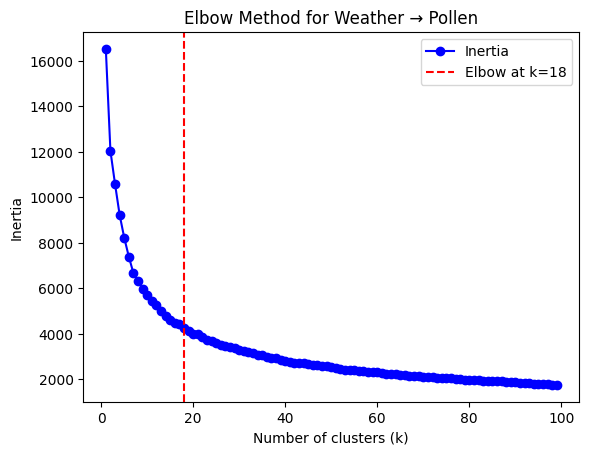

Elbow detected at k = 14 for Weather → AQI


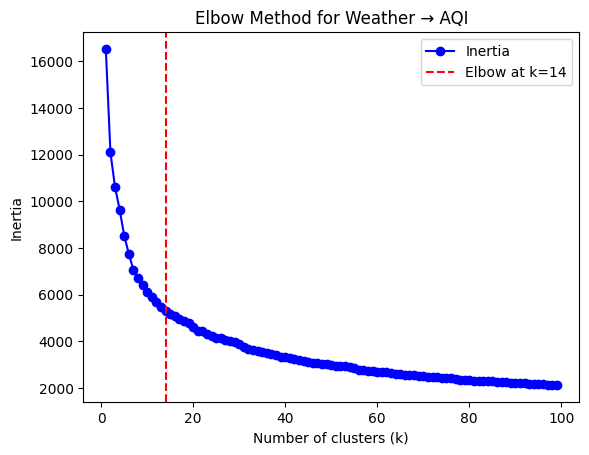

Elbow detected at k = 12 for AQI ↔ Pollen


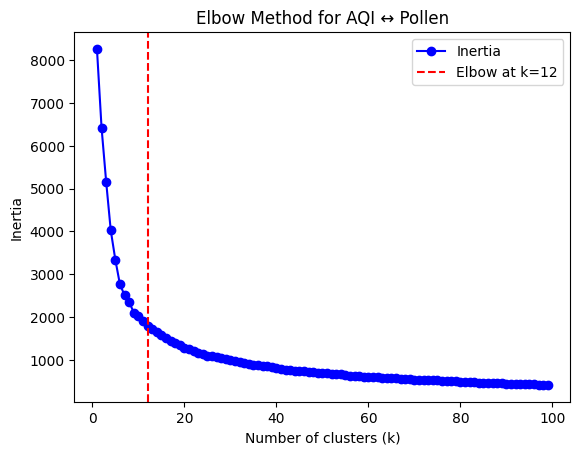

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Use your merged dataset
df = merged.copy()

# Add month and day features
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# -----------------------------
# Define datasets for clustering
# -----------------------------
datasets = {
    "Weather → Pollen": df[['temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)',
                            'precipitation_sum (mm)', 'wind_gusts_10m_max (km/h)',
                            'wind_speed_10m_max (km/h)', 'Total_Pollen',
                            'month', 'day']].dropna(),
    
    "Weather → AQI": df[['temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)',
                         'precipitation_sum (mm)', 'wind_gusts_10m_max (km/h)',
                         'wind_speed_10m_max (km/h)', 'AQI',
                         'month', 'day']].dropna(),
    
    "AQI ↔ Pollen": df[['AQI', 'Total_Pollen', 'month', 'day']].dropna()
}

# -----------------------------
# Standardize data
# -----------------------------
scalers = {name: StandardScaler().fit_transform(data) for name, data in datasets.items()}

# -----------------------------
# Elbow method to find best k
# -----------------------------
for name, data_scaled in scalers.items():
    inertias = []
    K = range(1, 100)
    for k in K:
        km = KMeans(n_clusters=k, init='k-means++', random_state=42)
        km.fit(data_scaled)
        inertias.append(km.inertia_)

    # Detect elbow automatically
    kn = KneeLocator(K, inertias, curve='convex', direction='decreasing')
    elbow_k = kn.knee
    print(f"Elbow detected at k = {elbow_k} for {name}")

    # Plot
    plt.figure()
    plt.plot(K, inertias, 'bo-', label='Inertia')
    if elbow_k is not None:
        plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow at k={elbow_k}')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for {name}')
    plt.legend()
    plt.show()


## Re-Running Clusters with Dates (month + day) included

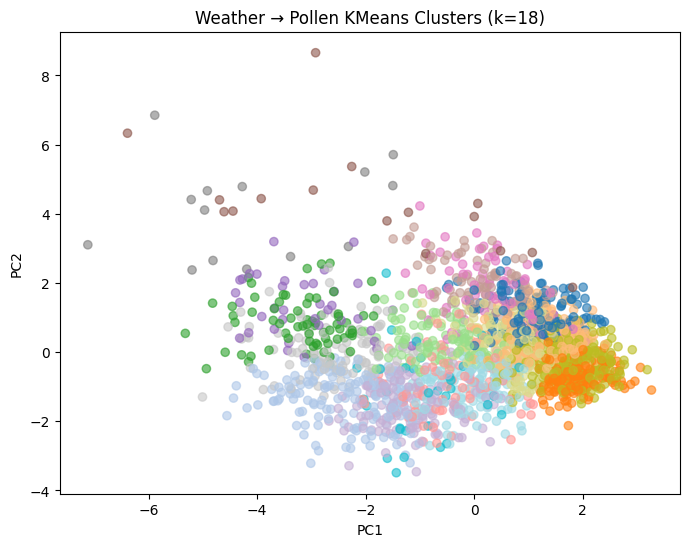


Weather → Pollen Cluster Means:
          temperature_2m_mean (°C)  apparent_temperature_mean (°C)  \
cluster                                                             
0                       24.122000                       25.193333   
1                        5.316993                        1.420915   
2                       21.302976                       22.420833   
3                       23.657576                       24.832035   
4                        9.407143                        4.892857   
5                       17.576471                       15.925490   
6                       16.191139                       14.918987   
7                        8.000000                        4.697297   
8                        9.220438                        6.474453   
9                       15.600000                       14.668750   
10                      23.012088                       23.327473   
11                      20.088732                       21.130986   


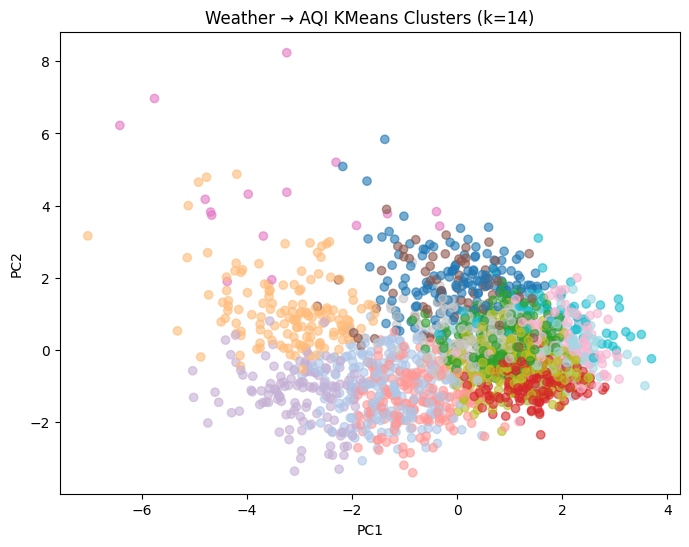


Weather → AQI Cluster Means:
          temperature_2m_mean (°C)  apparent_temperature_mean (°C)  \
cluster                                                             
0                       22.576000                       22.650667   
1                       10.174129                        7.328358   
2                        9.076190                        4.772789   
3                       22.275490                       22.954412   
4                       19.148701                       19.490260   
5                       12.398895                       10.339779   
6                        3.517557                       -0.858015   
7                       19.068657                       19.840299   
8                       12.637500                       10.337500   
9                       23.872483                       25.479866   
10                      17.635294                       16.381618   
11                      20.180172                       20.525862   
12 

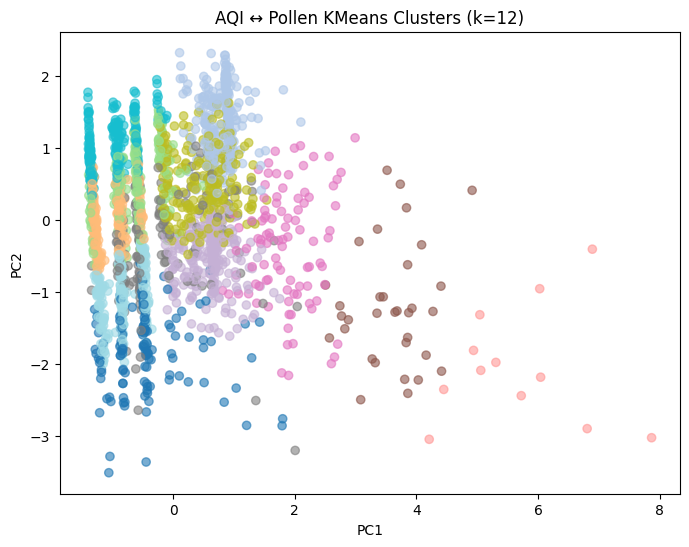


AQI ↔ Pollen Cluster Means:
                AQI  Total_Pollen     month        day
cluster                                              
0        57.276596     53.081560  7.241135   6.929078
1        32.248062     69.399729  3.736434  25.139535
2        24.781095     12.994726  8.358209  14.611940
3        39.561086     21.588235  7.171946  23.895928
4        38.000000   2115.166667  5.083333  10.833333
5        31.830508     92.230720  4.750000   5.936441
6        33.060606   1324.102424  5.212121  11.515152
7        34.833333    634.607292  5.010417  14.656250
8        60.500000     73.580822  6.383562  22.363014
9        27.160377    115.845377  5.051887  16.547170
10       25.020305     14.075279  8.101523  26.065990
11       33.013889     14.708704  8.023148   6.203704


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# -----------------------------
# 1. Define feature sets
# -----------------------------
weather_vars = [
    'temperature_2m_mean (°C)',
    'apparent_temperature_mean (°C)',
    'precipitation_sum (mm)',
    'wind_gusts_10m_max (km/h)',
    'wind_speed_10m_max (km/h)'
]

# Copy your cleaned dataset
df = pollen_season_clean.copy()

# Add month and day as numerical features
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# -----------------------------
# Helper function to cluster and plot
# -----------------------------
def cluster_and_plot(df, features, n_clusters=3, title_prefix=""):
    X = df[features].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
    labels = kmeans.fit_predict(X_scaled)
    X['cluster'] = labels
    
    # PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab20', alpha=0.6)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'{title_prefix} KMeans Clusters (k={n_clusters})')
    plt.show()
    
    # Show cluster means
    cluster_summary = X.groupby('cluster')[features].mean()
    print(f"\n{title_prefix} Cluster Means:\n", cluster_summary)
    
    return X, cluster_summary

# -----------------------------
# 2. Weather → Pollen (with month/day)
# -----------------------------
features_weather_pollen = weather_vars + ['Total_Pollen', 'month', 'day']
cluster_wp, summary_wp = cluster_and_plot(df, features_weather_pollen, n_clusters=18, title_prefix="Weather → Pollen")

# -----------------------------
# 3. Weather → AQI (with month/day)
# -----------------------------
features_weather_aqi = weather_vars + ['AQI', 'month', 'day']
cluster_wa, summary_wa = cluster_and_plot(df, features_weather_aqi, n_clusters=14, title_prefix="Weather → AQI")

# -----------------------------
# 4. AQI ↔ Pollen (with month/day)
# -----------------------------
features_aqi_pollen = ['AQI', 'Total_Pollen', 'month', 'day']
cluster_ap, summary_ap = cluster_and_plot(df, features_aqi_pollen, n_clusters=12, title_prefix="AQI ↔ Pollen")


## Weather → Pollen Cluster Summary

The KMeans clustering (k=18) identified distinct **weather regimes** and their typical **pollen levels**:

| Cluster | Avg Temp (°C) | Precip (mm) | Wind Gust (km/h) | Wind Speed (km/h) | Avg Pollen | Month | Day | Description |
|---------|---------------|-------------|-----------------|-----------------|------------|-------|-----|------------|
| 16      | 16.6          | 1.0         | 39              | 20              | 1664       | 5.2   | 10.9 | **Extreme pollen**: moderate temp, dry, moderate wind |
| 5       | 17.6          | 1.4         | 44              | 23              | 188        | 5.4   | 16.6 | **High pollen**: mild temp, low precipitation |
| 6       | 16.2          | 1.9         | 36              | 18              | 735        | 5.2   | 14.2 | **Moderate pollen**: mild, slightly windy |
| 4       | 9.4           | 1.0         | 59              | 30              | 183        | 4.1   | 20.4 | **Moderate pollen**: cool, windy, dry |
| 1       | 5.3           | 1.3         | 39              | 20              | 36         | 3.4   | 23.9 | **Low pollen**: very cold, calm wind |
| 9       | 15.6          | 53.2        | 56              | 27              | 30         | 6.4   | 18.8 | **Low pollen**: very rainy, moderate wind |
| 12      | 12.6          | 11.7        | 85              | 39              | 69         | 4.9   | 17.6 | **Medium pollen**: cool, rainy, very windy |
| 13      | 7.8           | 2.8         | 50              | 25              | 88         | 4.4   | 7.0  | **Medium pollen**: cold, dry, windy |
| 2       | 21.3          | 0.8         | 26              | 13              | 21         | 7.8   | 21.8 | **Low pollen**: warm, dry, calm wind |
| 0       | 24.1          | 1.3         | 43              | 21              | 28         | 7.7   | 7.9  | **Low pollen**: hot, dry, moderate wind |
| 3       | 23.7          | 1.5         | 36              | 18              | 32         | 6.9   | 25.0 | **Low pollen**: warm, light precipitation |
| 10      | 23.0          | 3.1         | 53              | 26              | 27         | 7.2   | 21.1 | **Low pollen**: warm, moderate precipitation |
| 11      | 20.1          | 19.8        | 43              | 21              | 19         | 7.5   | 15.8 | **Low pollen**: mild, heavy rain |
| 14      | 21.9          | 1.5         | 30              | 15              | 24         | 7.8   | 7.1  | **Low pollen**: warm, dry |
| 15      | 16.8          | 0.9         | 37              | 19              | 10         | 8.8   | 21.9 | **Low pollen**: mild, dry |
| 7       | 8.0           | 19.7        | 56              | 26              | 59         | 4.0   | 20.6 | **Medium pollen**: cold, rainy, windy |
| 8       | 9.2           | 1.6         | 34              | 17              | 115        | 4.5   | 7.6  | **High pollen**: cool, dry, moderate wind |
| 17      | 15.7          | 1.0         | 32              | 16              | 136        | 5.2   | 19.4 | **High pollen**: mild, dry, light wind |

**Notes:**
- **High pollen clusters**: moderate temperatures, low precipitation, moderate wind.
- **Low pollen clusters**: extreme cold or heavy rain suppress pollen counts.
- Wind amplifies pollen dispersal, especially in cooler clusters.
- Month and day help capture seasonal timing of pollen peaks.

---

## Weather → AQI Cluster Summary

KMeans clustering (k=14) identified distinct **weather conditions** and their typical **AQI levels**:

| Cluster | Avg Temp (°C) | Precip (mm) | Wind Gust (km/h) | Wind Speed (km/h) | Avg AQI | Month | Day | Description |
|---------|---------------|-------------|-----------------|-----------------|---------|-------|-----|------------|
| 12      | 24.7          | 0.9         | 38              | 7               | 70      | 6.8   | 10.9 | **High AQI**: hot, dry, calm wind |
| 9       | 23.9          | 1.6         | 33              | 16              | 47      | 7.6   | 7.9  | **Moderate AQI**: warm, dry, moderate wind |
| 0       | 22.6          | 2.7         | 53              | 26              | 39      | 6.8   | 15.3 | **Moderate AQI**: warm, moderate precipitation |
| 3       | 22.3          | 1.8         | 36              | 19              | 33      | 6.8   | 25.5 | **Moderate AQI**: warm, light precipitation |
| 13      | 23.5          | 0.9         | 32              | 17              | 55      | 6.9   | 24.2 | **High AQI**: warm, dry, moderate wind |
| 4       | 19.1          | 0.8         | 27              | 13              | 28      | 8.2   | 22.1 | **Low AQI**: mild, dry, light wind |
| 7       | 19.1          | 23.5        | 43              | 21              | 29      | 7.2   | 15.3 | **Low AQI**: mild, rainy |
| 1       | 10.2          | 1.8         | 38              | 19              | 31      | 4.7   | 6.9  | **Low AQI**: cool, dry, moderate wind |
| 2       | 9.1           | 4.7         | 59              | 30              | 30      | 4.2   | 15.9 | **Low AQI**: cold, dry, gusty wind |
| 5       | 12.4          | 1.1         | 34              | 17              | 33      | 4.5   | 21.3 | **Low AQI**: cool, dry, calm wind |
| 6       | 3.5           | 2.4         | 42              | 22              | 31      | 3.3   | 22.6 | **Low AQI**: very cold |
| 8       | 12.6          | 48.2        | 66              | 31              | 28      | 5.4   | 21.1 | **Low AQI**: mild, heavy rain |
| 10      | 17.6          | 1.5         | 42              | 22              | 24      | 8.3   | 18.4 | **Low AQI**: warm, dry |
| 11      | 20.2          | 1.6         | 32              | 16              | 28      | 7.5   | 7.9  | **Low AQI**: warm, dry |

**Notes:**
- **High AQI clusters**: hot, dry days with light/moderate wind.
- **Low AQI clusters**: cold or rainy conditions suppress air pollution.
- Seasonal timing is captured via month/day.

---

## AQI ↔ Pollen Cluster Summary

KMeans clustering (k=12) identifies typical **AQI–Pollen combinations**:

| Cluster | Avg AQI | Avg Total Pollen | Month | Day | Description |
|---------|---------|----------------|-------|-----|------------|
| 4       | 38.0    | 2115           | 5.1   | 10.8 | **Extreme pollen, moderate AQI**: rare pollen spikes |
| 6       | 33.1    | 1324           | 5.2   | 11.5 | **High pollen, moderate AQI**: spring peak |
| 7       | 34.8    | 635            | 5.0   | 14.7 | **High pollen, moderate AQI**: moderately polluted spring days |
| 5       | 31.8    | 92             | 4.7   | 5.9  | **Moderate pollen, low AQI**: typical mild days |
| 0       | 57.3    | 53             | 7.2   | 6.9  | **Moderate pollen, high AQI**: hot and polluted days |
| 1       | 32.2    | 69             | 3.7   | 25.1 | **Moderate pollen, moderate AQI**: early spring |
| 2       | 24.8    | 13             | 8.4   | 14.6 | **Low pollen, low AQI**: late summer |
| 3       | 39.6    | 22             | 7.2   | 23.9 | **Low pollen, moderate AQI**: clean but warm days |
| 8       | 60.5    | 74             | 6.4   | 22.4 | **Moderate pollen, high AQI**: hot, polluted days |
| 9       | 27.2    | 116            | 5.1   | 16.5 | **Moderate pollen, low AQI**: mild spring days |
| 10      | 25.0    | 14             | 8.1   | 26.1 | **Low pollen, low AQI**: late summer |
| 11      | 33.0    | 15             | 8.0   | 6.2  | **Low pollen, moderate AQI**: mild late summer |

**Notes:**
- **High pollen clusters**: clusters 4, 6, 7—spring peaks with moderate AQI.
- **High AQI clusters**: clusters 0, 8—hot, sometimes moderately high pollen.
- Month/day help identify seasonal patterns in pollen spikes and AQI.
